In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Load the Dataset
file_path = "../data/Global_Superstore_2016.xlsx"
df = pd.read_excel(file_path)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [8]:
#Initial Inspection
df.shape

(51290, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [10]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373


In [13]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [12]:
# drop the postal code
df = df.drop(columns=['Postal Code'])


In [14]:
#check for any duplicate records
df.duplicated().sum()



np.int64(0)

In [17]:
#fix date format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Ship Date']

0       2014-11-13
1       2014-02-07
2       2014-10-18
3       2014-01-30
4       2014-11-06
           ...    
51285   2015-06-19
51286   2014-05-10
51287   2012-08-31
51288   2013-02-21
51289   2013-05-26
Name: Ship Date, Length: 51290, dtype: datetime64[ns]

In [18]:
#Create Time-Based Features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()
df['Order Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID            51290 non-null  int64         
 1   Order ID          51290 non-null  object        
 2   Order Date        51290 non-null  datetime64[ns]
 3   Ship Date         51290 non-null  datetime64[ns]
 4   Ship Mode         51290 non-null  object        
 5   Customer ID       51290 non-null  object        
 6   Customer Name     51290 non-null  object        
 7   Segment           51290 non-null  object        
 8   City              51290 non-null  object        
 9   State             51290 non-null  object        
 10  Country           51290 non-null  object        
 11  Region            51290 non-null  object        
 12  Market            51290 non-null  object        
 13  Product ID        51290 non-null  object        
 14  Category          5129

In [21]:
df['Order Month Name']

0        November
1        February
2         October
3         January
4        November
           ...   
51285        June
51286         May
51287      August
51288    February
51289         May
Name: Order Month Name, Length: 51290, dtype: object

In [22]:
#Create Business Metrics

# Profit Margin
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100



In [23]:
df['Profit Margin (%)']

0        28.000000
1        -7.784693
2        17.776630
3        -3.337586
4        10.996272
           ...    
51285     6.912442
51286    20.000000
51287    29.000000
51288    17.857143
51289     2.932551
Name: Profit Margin (%), Length: 51290, dtype: float64

In [24]:
#Handle division edge cases
df['Profit Margin (%)'] = df['Profit Margin (%)'].replace([np.inf, -np.inf], np.nan)


In [25]:
df['Profit Margin (%)']

0        28.000000
1        -7.784693
2        17.776630
3        -3.337586
4        10.996272
           ...    
51285     6.912442
51286    20.000000
51287    29.000000
51288    17.857143
51289     2.932551
Name: Profit Margin (%), Length: 51290, dtype: float64

In [26]:
#Check for negative or zero sales
df[df['Sales'] <= 0]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Month Name,Order Year-Month,Profit Margin (%)


In [27]:
#Final Data Quality Check
df.isnull().sum()


Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Region               0
Market               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
Order Priority       0
Order Year           0
Order Month          0
Order Month Name     0
Order Year-Month     0
Profit Margin (%)    0
dtype: int64

In [28]:
df.shape


(51290, 28)

In [29]:
#High-Level Business KPIs
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
avg_profit_margin = df['Profit Margin (%)'].mean()

total_sales, total_profit, total_orders, avg_profit_margin


(np.float64(12642501.90988),
 np.float64(1467457.2912799998),
 25728,
 np.float64(4.742959939321046))

In [30]:
#Sales Trend Over Time (Monthly)
monthly_sales = (
    df.groupby('Order Year-Month')['Sales']
    .sum()
    .reset_index()
)

monthly_sales.head()


,Order Year-Month,Sales
0,2012-01,98898.48886
1,2012-02,103717.92328
2,2012-03,135746.40206
3,2012-04,114332.96318
4,2012-05,158228.32880


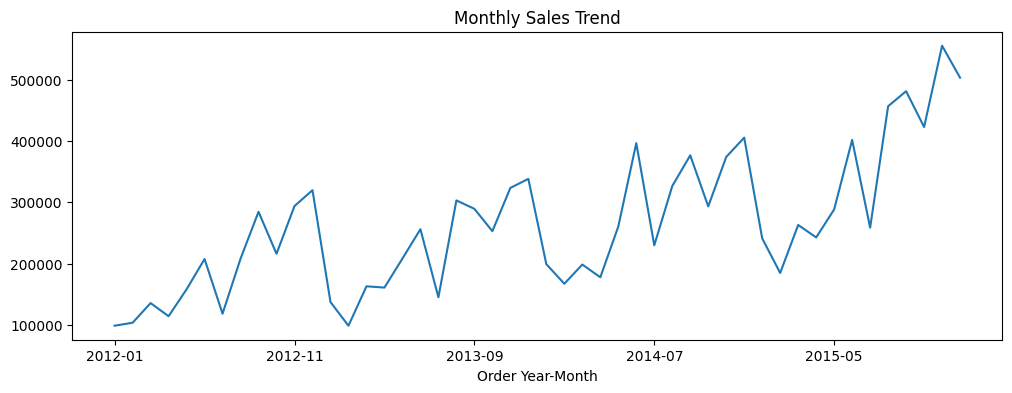

In [31]:
#plot for insight
monthly_sales.set_index('Order Year-Month')['Sales'].plot(
    figsize=(12,4),
    title='Monthly Sales Trend'
)
plt.show()


In [33]:
#Sales and Profit by Category
category_summary = (
    df.groupby('Category')[['Sales', 'Profit']]
    .sum()
    .sort_values(by='Sales', ascending=False)
)

category_summary


,Sales,Profit
Category,,
Technology,4.744557e+06,663778.73318
Furniture,4.110452e+06,285082.73020
Office Supplies,3.787493e+06,518595.82790


In [34]:
#Top 10 Products by Revenue
top_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64

In [35]:
#Bottom 10 Products (Declining / Weak Performance)
bottom_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values()
    .head(10)
)

bottom_products


Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Newell 308                                                          8.400
Name: Sales, dtype: float64

In [36]:
#Regional Performance
region_summary = (
    df.groupby('Region')[['Sales', 'Profit']]
    .sum()
    .sort_values(by='Sales', ascending=False)
)

region_summary


,Sales,Profit
Region,,
Western Europe,1.731930e+06,218433.50850
Central America,1.223101e+06,158981.64816
Oceania,1.100185e+06,120089.11200
Southeastern Asia,8.844232e+05,17852.32900
Southern Asia,8.665727e+05,159336.42700
Eastern Asia,8.550594e+05,167101.85100
Western US,7.254578e+05,108418.44890
Eastern US,6.787812e+05,91522.78000
Northern Europe,6.367792e+05,83923.91700


In [37]:
#Prepare Power BI–Ready Dataset (Final Export)
output_path = "../outputs/clean_sales_data.csv"
df.to_csv(output_path, index=False)
